## Exercise 1

A time dependent signal is described by the relation:

\begin{equation}
s(t) = \sin{(0.01*t)} + 3 \cos{(0.03*t)}
\end{equation}

The signal is sampled for a total period $T=1000$ at time intervals $\Delta t = 1$. The final data stream can be written as a vector with entries $d_i = d(t_i) = s(t_i) + n(t_i)$, where $t_i$ are the sampled times and $n_i \equiv n(t_i)$ is an instrumental noise component. The noise coefficients are independent Gaussian random variables with variance $\sigma = 2$. 


1. Write a function that generates simulated data and plot one data vector.

2. Now generate $10$ simulated data vectors and plot the average $\langle d_i \rangle$ over these ten realizations.

3. Consider again a single realization. You now want to produce a smoothed version of the signal, by convolving it with a Gaussian filter with $\sigma = 2$. Write a function that generates this Gaussian window in the sampled points, then generate the smoothed signal using fft algorithms and produce a plot that shows both the starting data vector and the smoothed one.

In [7]:
import numpy as np
from matplotlib import pyplot as plt 

1000


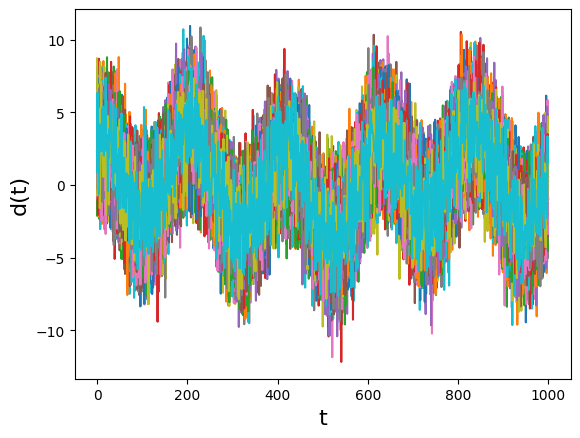

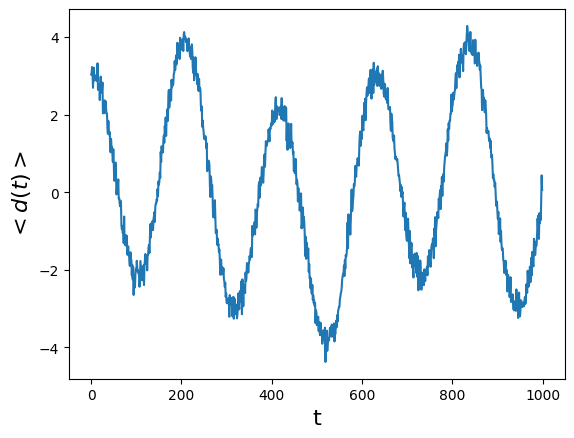

In [13]:
# Sampling period
T = 1000.
# Sampling time interval
dt = 1.
# Error
std = 2.0
# Length of data vectors
sample_size = int(T/dt)
print(sample_size)
# Number of simulations
nsims = 100

seed = 1243487
np.random.seed(seed)

def gen_data(T,dt,std):
    # Generate s = signal
    time = np.arange(0.,T,dt)
    #s = 0.5*a*time**2
    s = np.sin(0.01*time) + 3.*np.cos(0.03*time)
    #plt.plot(s)
    #plt.show()    
    # Generate n = noise
    mean = 0.
    # Generate T/dt Gaussian r.v., with unitary variance 
    n = np.random.normal(mean,std,size=len(time))
    #plt.plot(n)
    #plt.show()
    # Generate data
    .
    d = s + n
    return time, d

# Array of simulations
d = np.zeros( (sample_size,nsims) )

for i in range(nsims):
    tt, d[:,i] = gen_data(T,dt,std)
    plt.plot(tt,d[:,i])
    plt.xlabel('t',size=16)
    plt.ylabel('d(t)',size=16)
plt.show()


# Average over noise
avs = np.mean(d,axis=1)
# Plotting average
plt.plot(tt,avs)
plt.xlabel('t',size=16)
plt.ylabel('$ < d(t) > $',size=16)
plt.show()

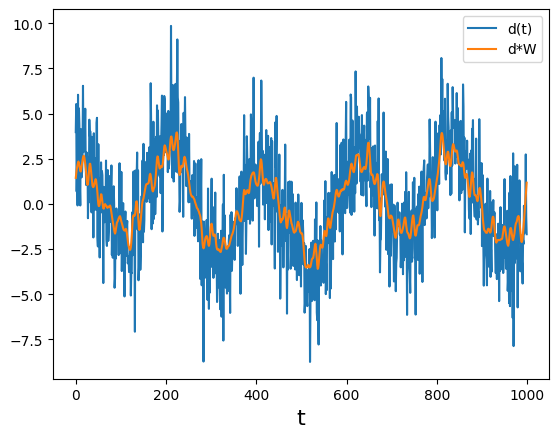

In [15]:
# Generate Window function
def gauss_window(sigma,sample_size):
    # Window function sampled in time
    def gauss(x,sigma):
        norm = 1./(2.*sigma**2)
        f = norm*np.exp(-(x**2)/(2.*sigma**2))
        return f
    gauss = np.vectorize(gauss)
    x = np.arange(0,sample_size+1.,1.)
    # Window (with periodic boundary conditions)
    W = gauss(x,sigma) + gauss(x-sample_size,sigma)
    return W

smoothing = 2.
W = gauss_window(smoothing,sample_size)

# FFT of data
tt, d = gen_data(T,dt,std)
ck_d = np.fft.rfft(d)
# Intialize vector of smoothed data
d_filtered = np.zeros(sample_size)
# FFT of window
W = gauss_window(smoothing,sample_size)
ck_W = np.fft.rfft(W)
# Multiply FFTs and inverse FFT to get convolution d*W
ck_filtered = ck_d*ck_W
d_filtered = np.fft.irfft(ck_filtered)
# Plotting intial and smoothed data vector
plt.plot(tt,d,label='d(t)')
plt.plot(tt,d_filtered,label='d*W') 
plt.xlabel('t',size=16)
plt.legend()
plt.show()

## Exercise 2

The rate at which a ﬁnite resource (such as oil) is gathered depends on the diﬃculty and on the demand. Assume that the demand D increases with the fractional amount extracted E :
\begin{equation}
\frac{dD}{dt} = \alpha E
\end{equation}

Assume  that  the  diﬃculty  of  extraction   W    is  inversely  dependent  on the  fraction  remaining:

\begin{equation}
W=\frac{1}{1−E}
\end{equation}

Finally,   assume   that   the   rate   of   extraction   R   is   the   ratio   of   demand to  diﬃculty:

\begin{equation}
R \equiv \frac{dE}{dt} = \frac{D}{W}
\end{equation}

Assume  also  that  the  cost  C  of  the  resource  depends  on  the  extraction rate  and  on  the  demand:

\begin{equation}
C = \beta \frac{D}{R}
\end{equation}

where $\beta$ is  some  scale  factor.

Write a program that plots the extraction rate and the cost as a function of time, for this simple model. Good starting values are $D(0) = 0.1$, $\alpha = 2.0$,  and  $\beta  =  0.01$,  plotted over a total time range of 0 to 5.
Use your own function to integrate the system of ODEs (no python libraries allowed)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

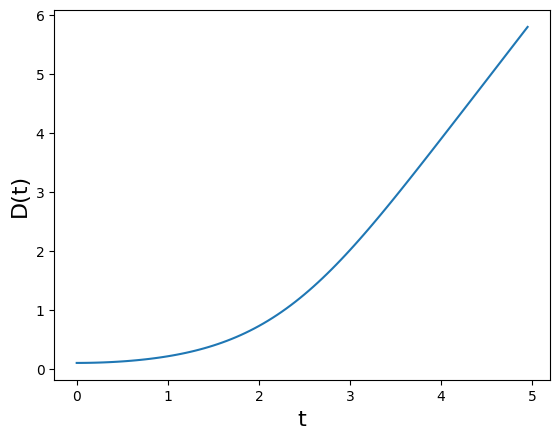

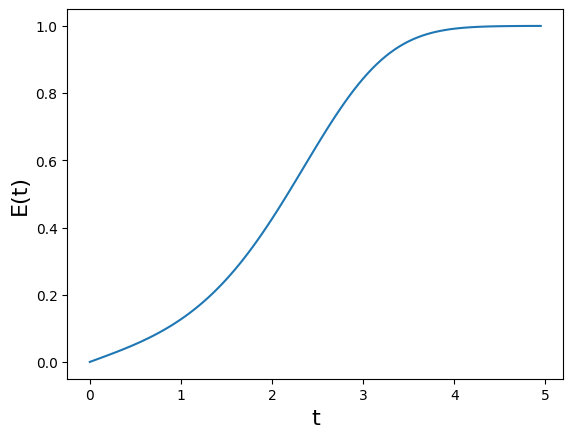

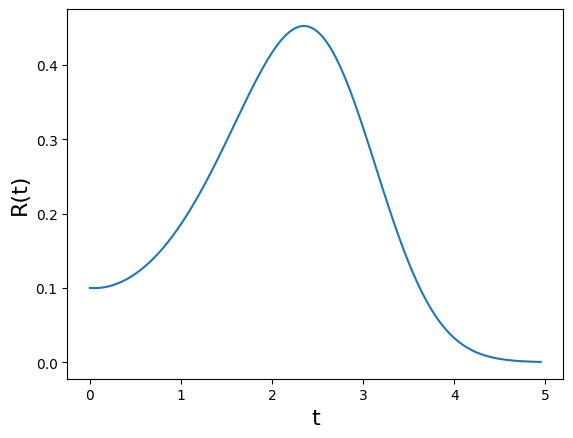

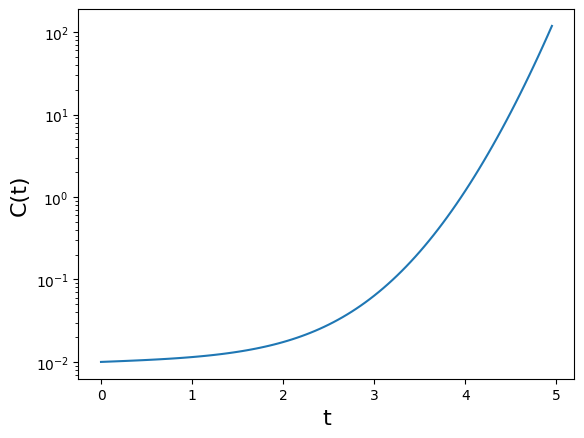

In [16]:
def f(x,t):
    alpha = 2.0
    D = x[0]
    E = x[1]
    W = 1./(1.-E)
    omega = 1.0
    f1 = alpha*E
    f2 = D/W
    return np.array([f1,f2],dtype='float')

def rk4(f,specs):
    # Solve ODE with 4th order Runge-Kutta
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = np.array(specs['x0'],dtype='float')
    Nequations = x.size
    xt = np.zeros((specs['N']+1,Nequations),dtype='float')
    xt[0,:] = x
    ts = np.arange(specs['t0'],specs['t1'],h)
    for i in range(len(ts)):
        t = ts[i]
        k1 = h*np.array(f(x,t))
        k2 = h*np.array(f(x+0.5*k1,t+0.5*h))
        k3 = h*np.array(f(x+0.5*k2,t+0.5*h))
        k4 = h*np.array(f(x + k3, t + h))
        x += (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        xt[i+1,:] = x
        
    return ts, xt[:-1]


D0 = 0.1
E0 = 0.

specs = {'x0': [D0 ,E0], 't0':0., 't1':5., 'N': 100}

t, x = rk4(f,specs)

beta = 0.01

D = x[:,0]
E = x[:,1]
W = 1./(1-E)
R = D/W
C = (D/R)*beta

plt.plot(t,D)
plt.xlabel('t',size=16)
plt.ylabel('D(t)',size=16)
plt.show()

plt.plot(t,E)
plt.xlabel('t',size=16)
plt.ylabel('E(t)',size=16)
plt.show()

plt.plot(t,R)
plt.xlabel('t',size=16)
plt.ylabel('R(t)',size=16)
plt.show()

plt.plot(t,C)
plt.xlabel('t',size=16)
plt.ylabel('C(t)',size=16)
plt.yscale('log')
plt.show()